In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-dataset/insurance.csv


In [2]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("/kaggle/input/medical-insurance-cost-dataset/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# LETS UNDERSTAND THE DATASET
print("shape of dataset ",df.shape)
print("====================\n")
print("columns name are :- ",df.columns)
print("====================\n")
print("infromation of all columns present in the datset\n ",df.info())
print("====================\n")
print(" analysis of numerical columns\n ",df.describe())
print("====================")
print("analyis of non-numerical feature \n",df.describe(include="O"))

shape of dataset  (1338, 7)

columns name are :-  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
infromation of all columns present in the datset
  None

 analysis of numerical columns
                 age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000

 ## dataset knowledge
* here there are different categorical columns like region,smokers,children,sex

columns :-

1.  age: Age of primary beneficiary (int)
2.  sex: Gender of beneficiary (male, female)
3.  bmi: Body Mass Index, a measure of body fat based on height and weight (float)
4.  children: Number of children covered by health insurance (int)
5.  smoker: Smoking status of the beneficiary (yes, no)
6.  region: Residential region in the US (northeast, northwest, southeast, southwest)
7.  charges: Medical insurance cost billed to the beneficiary (float)

In [5]:
# lets check for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# lets understand the data distribution of values in each feature
for i in df.columns:
    print(f"values count for {i}")
    print(df[i].value_counts())
    print("\n=================\n")

values count for age
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


values count for sex
sex
male      676
female    662
Name: count, dtype: int64


values count for bmi
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


values count for children
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


values count for smoker
smoker
no     1064
yes     274
Name: count, dtype: int64


values count for region
region
sou

## Visulization 


In [7]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

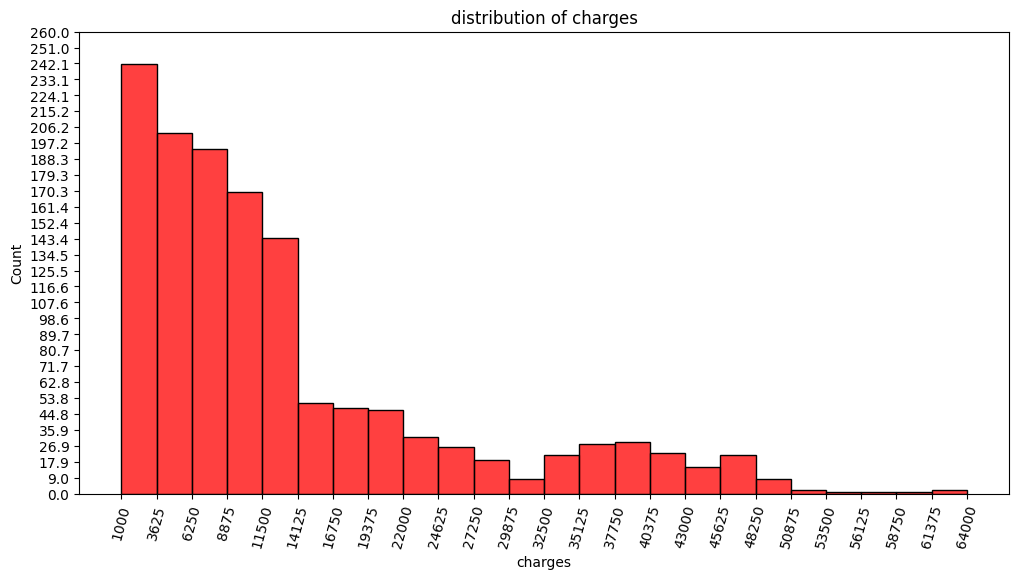

In [8]:
# lets first understand the distribution of our target feature (charges)
plt.figure(figsize = (12,6))
sns.histplot(x = "charges",data = df,bins = np.linspace(1000,64000,25),color="red")
plt.title("distribution of charges")
plt.xticks(np.linspace(1000,64000,25),rotation = 75)
plt.yticks(np.linspace(0,260,30))
plt.show()


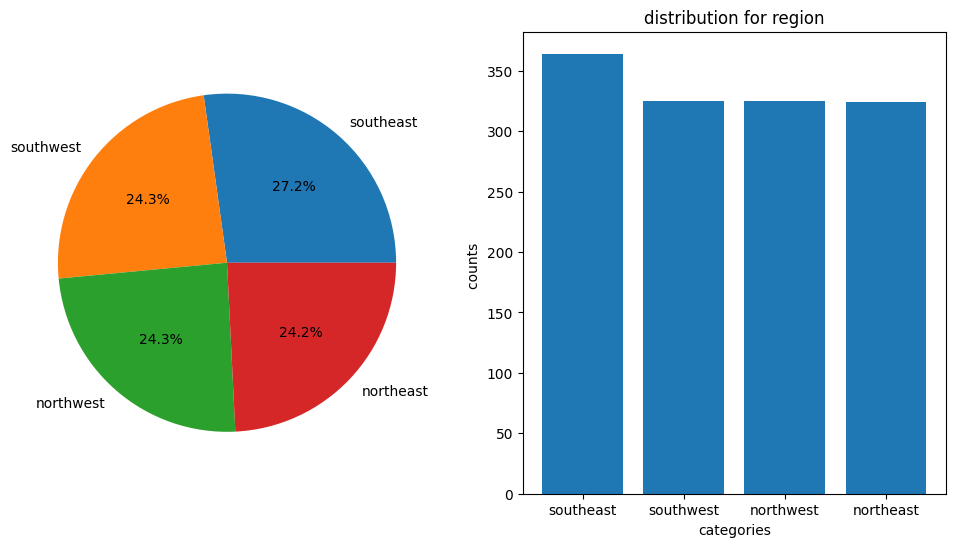

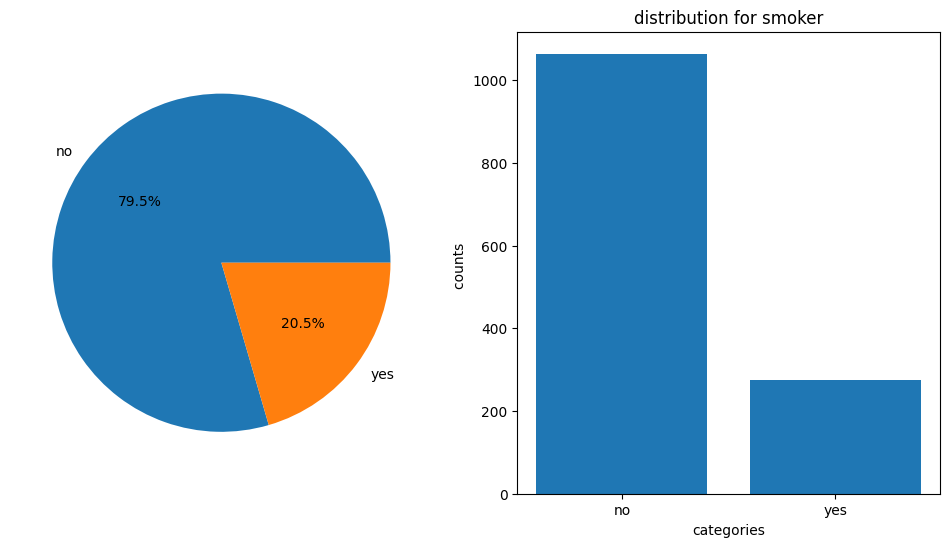

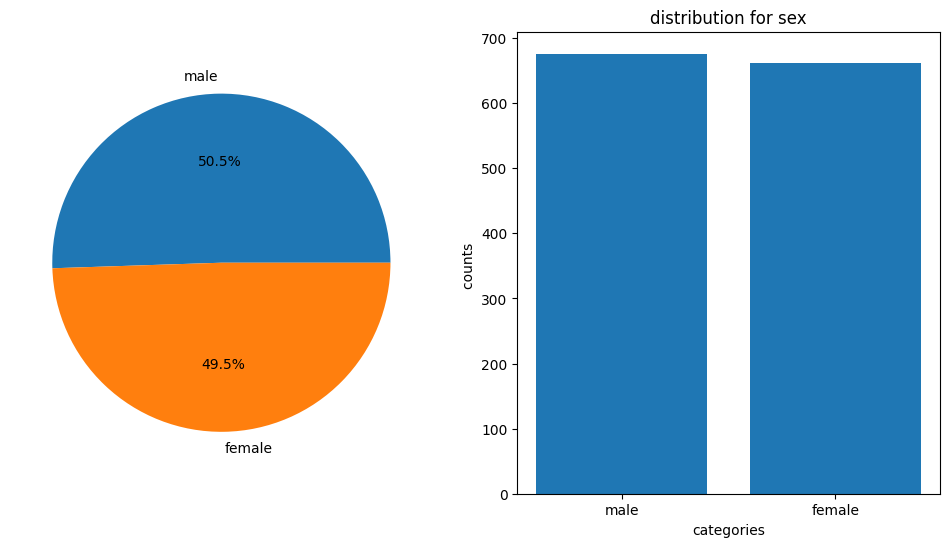

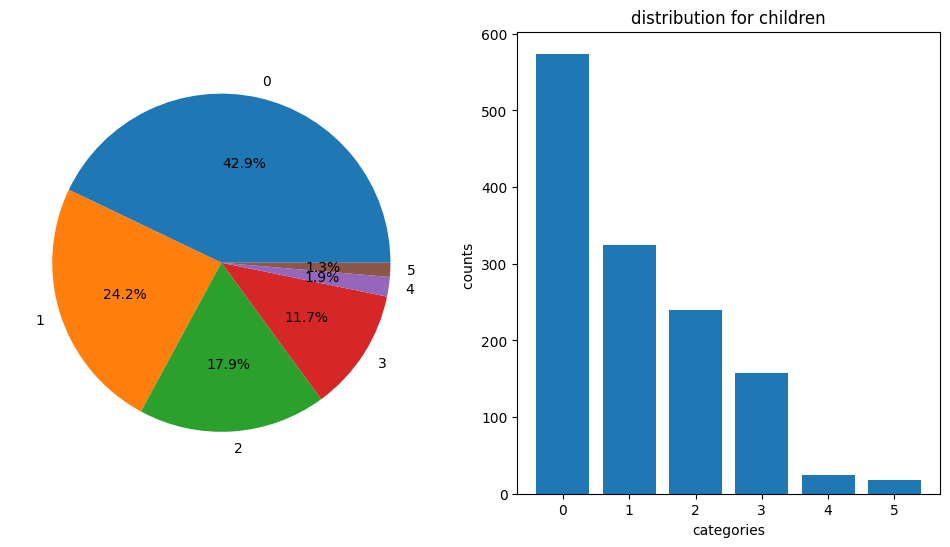

In [9]:
# lets understand the distribution for categorical data
cat_col = ["region","smoker","sex","children"]
for i in cat_col:
    fig,ax =plt.subplots(1,2,figsize=(12,6)) 
    # lets plot piechart
    ax[0].pie(df[i].value_counts(),labels = df[i].value_counts().index,autopct="%1.1f%%")
    # barplot
    ax[1].bar(df[i].value_counts().index, df[i].value_counts())
    ax[1].set_xlabel("categories")
    ax[1].set_ylabel("counts ")
    
    plt.title(f"distribution for {i}")
    
    plt.show()

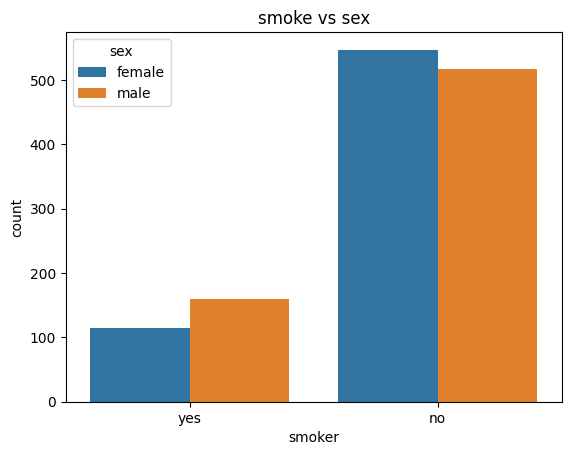

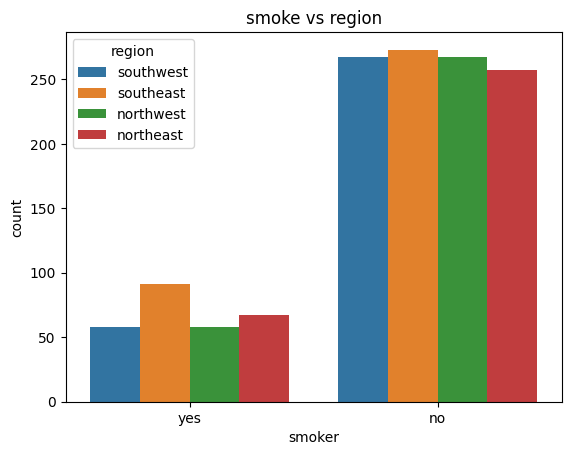

In [10]:
# lets compare the sex ,region vs smoker (countplot for each)
cols =["sex","region"]
for i in cols:
    plt.title(f"smoke vs {i}")
    sns.countplot(x= "smoker",data = df,hue=i)
    plt.show()

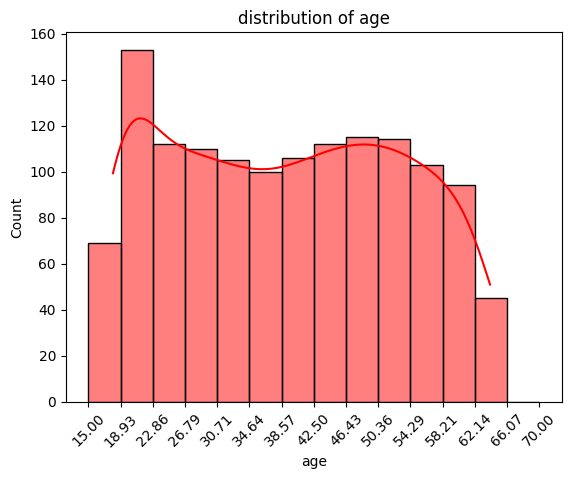

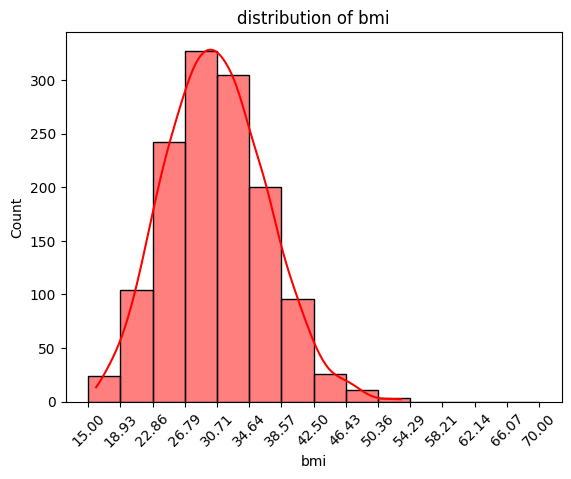

In [11]:
#  now distribuion for rest of remaining feature
col = ["age","bmi"]
for i in col:
    sns.histplot(x= i,data = df, bins = np.linspace(15,70,15),color = "red",kde=True)
    plt.xticks(np.linspace(15,70,15),rotation = 45)
    plt.title("distribution of "+i)
    plt.show()

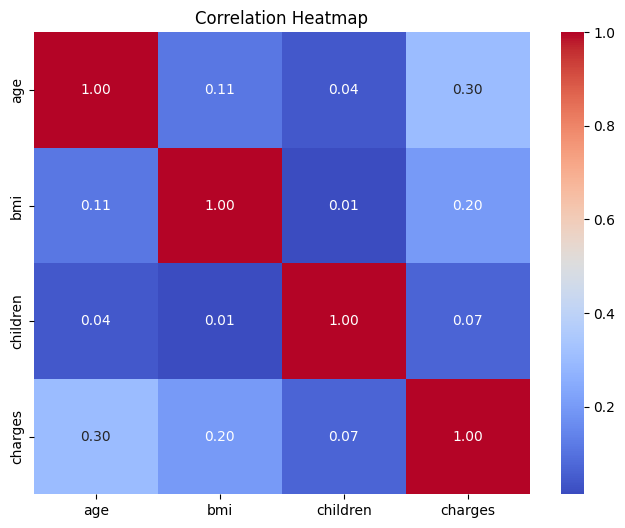

In [12]:
# lets undertsand the orrelation between numerical values

plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show() 

In [13]:
# this shows that age is most related feature to charges

## feature eng

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
oe = OrdinalEncoder()
le = LabelEncoder()
ss = StandardScaler() 
dffinal=df.copy()
# for region
# dffinal["region"] = oe.fit_tranform(df["region"])
dffinal["smoker"] = le.fit_transform(df["smoker"])
dffinal["sex"] = le.fit_transform(df["sex"])
dffinal["bmi"]=ss.fit_transform(df[["bmi"]])
dffinal["age"]=ss.fit_transform(df[["age"]])
dffinal = pd.get_dummies(dffinal, columns=["children","region"], drop_first=False,dtype = int)
dffinal

,age,sex,bmi,smoker,charges,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,1,16884.92400,1,0,0,0,0,0,0,0,0,1
1,-1.509965,1,0.509621,0,1725.55230,0,1,0,0,0,0,0,0,1,0
2,-0.797954,1,0.383307,0,4449.46200,0,0,0,1,0,0,0,0,1,0
3,-0.441948,1,-1.305531,0,21984.47061,1,0,0,0,0,0,0,1,0,0
4,-0.513149,1,-0.292556,0,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,0,10600.54830,0,0,0,1,0,0,0,1,0,0
1334,-1.509965,0,0.206139,0,2205.98080,1,0,0,0,0,0,1,0,0,0
1335,-1.509965,0,1.014878,0,1629.83350,1,0,0,0,0,0,0,0,1,0
1336,-1.296362,0,-0.797813,0,2007.94500,1,0,0,0,0,0,0,0,0,1


In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## MODELLING


In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dffinal.drop(columns = "charges"),dffinal["charges"])


In [18]:
# importing models

from sklearn.linear_model import LinearRegression       # Ordinary Least Squares
from sklearn.linear_model import Ridge                  # L2 regularized
from sklearn.linear_model import Lasso                  # L1 regularized
from sklearn.linear_model import ElasticNet             # L1 + L2 regularization
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
lr = LinearRegression()
l1 = Ridge()
l2 = Lasso()
l = ElasticNet()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()
adboost = AdaBoostRegressor()
tre =DecisionTreeRegressor()
models = [lr,l1,l2,l,forest,boost,adboost,tre]

In [19]:
from sklearn.metrics import r2_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = r2_score(ytest,i.predict(xtest))
    print(f"r2 score for {i }",r2)

    result[i] = r2*100
    print("\n====================\n")

LinearRegression() succesfully trained
r2 score for LinearRegression() 0.7539497552898123


Ridge() succesfully trained
r2 score for Ridge() 0.7537969418925723


Lasso() succesfully trained
r2 score for Lasso() 0.753975916878048


ElasticNet() succesfully trained
r2 score for ElasticNet() 0.37682900952597287


RandomForestRegressor() succesfully trained
r2 score for RandomForestRegressor() 0.8399401810659145


GradientBoostingRegressor() succesfully trained
r2 score for GradientBoostingRegressor() 0.8399952457204638


AdaBoostRegressor() succesfully trained
r2 score for AdaBoostRegressor() 0.8044318721791929


DecisionTreeRegressor() succesfully trained
r2 score for DecisionTreeRegressor() 0.7373876563388554




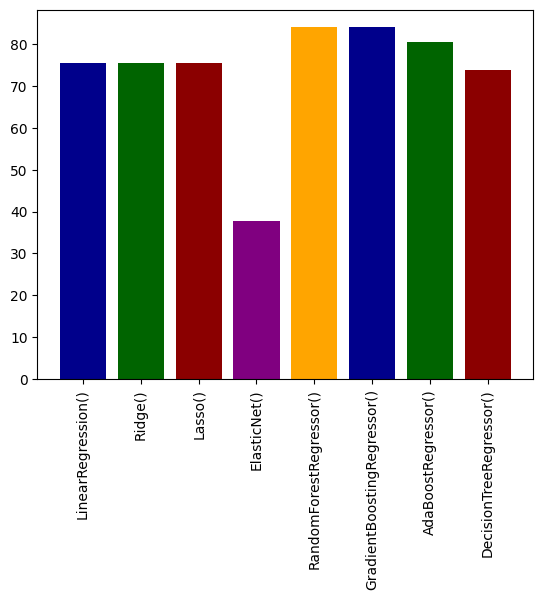

In [20]:
 # plot for differnt model
plt.bar([str(k) for k in result.keys()],result.values(), color=["darkblue","darkgreen","darkred","purple","orange"])
plt.xticks(rotation = 90)
plt.show()



## CONCLUSION 
After training and evaluating multiple regression models on the dataset, we compared their performance using a scoring metric. The results are as follows:
* Linear Regression: ~76.49
* Ridge Regression: ~76.47
* Lasso Regression: ~76.49
* ElasticNet Regression: ~37.34 (significantly lower performance)
* Decision Tree Regressor: ~69.61
* Random Forest Regressor: ~84.82
* AdaBoost Regressor: ~83.39
* Gradient Boosting Regressor: ~86.49

🔎 Insights:

* Linear, Ridge, and Lasso Regression performed almost identically, which suggests that regularization did not significantly improve performance in this dataset.
* ElasticNet underperformed heavily compared to other models, likely due to the balance of L1/L2 regularization not being suitable here.
* Tree-based ensemble methods (Random Forest, AdaBoost, Gradient Boosting) outperformed linear models, showing their ability to capture non-linear relationships and interactions in the data.
* Gradient Boosting Regressor achieved the best performance overall (~86.5), making it the most effective model for this dataset.

✅ Final Remark:
Ensemble methods, especially Gradient Boosting, provide a clear advantage over traditional regression techniques for this dataset. However, further tuning (e.g., hyperparameter optimization with GridSearchCV/RandomizedSearchCV) could potentially push the performance even higher.

> we can also do hyperparameter tunning for improving the results.
LINK FOR NOTEBOOK WITH HYPERPARAMETER TUNNING = "COMMING SOON"